In [1]:
#imports!

# let's import things
import h5py as h5 
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
plt.rc('font', family='serif')
import sys
import os
from scipy import stats
import seaborn as sns
import matplotlib as mpl

# Add the subdir to sys.path for our created scripts
sys.path.append('/home/jovyan/home/research_work/useful_py_scripts/')
sys.path.append('/home/jovyan/home/research_work/making_figures/paper_figures/')

# Now you can import the module
import useful_fncs
import figure_utils
import utils_from_others

# import for axes labels 
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif"
})

In [7]:
# Set the appropriate path to the data file + read in the data
pathToh5 = '/home/jovyan/CompasOutput/v03.21.00/N_5e6_MassiveWDWD_NSNS_fid/MainRun/COMPAS_Output_wWeights.h5'
Data  = h5.File(pathToh5, "r")

SPs = Data['BSE_System_Parameters'] # gathering the DCO group

# We want to make the traingle plot for the mass occurences of all systems and weigh them with mixtuire weights
# HDF5 files are most efficent if you apply the mask after reading in the key of interest

# we want to specifically look at all WD+COWD

stellar_types_1_all = SPs['Stellar_Type(1)'][()]
stellar_types_2_all = SPs['Stellar_Type(2)'][()]

HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool = useful_fncs.WD_BINARY_BOOLS(stellar_types_1_all, stellar_types_2_all)
carbon_oxygen_bool = np.logical_or(ONeCOWD_bool,np.logical_or(COONeWD_bool,np.logical_or(COHeWD_bool,np.logical_or(COWD_bool,HeCOWD_bool))))

stellar_types_1 = stellar_types_1_all[carbon_oxygen_bool]
stellar_types_2 = stellar_types_2_all[carbon_oxygen_bool]

mass1_all = SPs['Mass(1)'][()]
mass1 = mass1_all[carbon_oxygen_bool]

mass2_all = SPs['Mass(2)'][()]
mass2 = mass2_all[carbon_oxygen_bool]

# Now, let's make sure M1 represents the more massive object and M2 the less massive
M1 = np.maximum(mass1, mass2)
M2 = np.minimum(mass1, mass2)

mixture_weights_all = SPs['mixture_weight'][()]
mixture_weights = mixture_weights_all[carbon_oxygen_bool]

Data.close()

0.20825467225142325 148282.43148200054


Text(0, 0.5, '$M_{2}$[$M_{\\odot}$]')

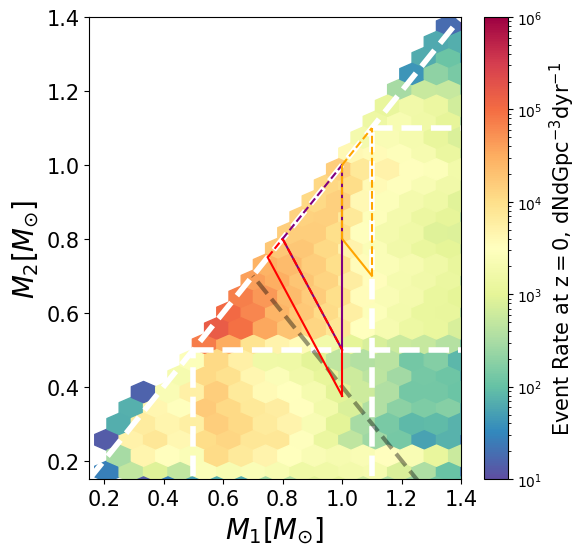

In [ ]:
# change figuresize
fig, ax = plt.subplots(figsize = (6,6))

vmin = 10
vmax = 10**6

# for 2D histogram or 2D plots, we need to use somethign that will allow us to use a color bar so something liek pcolormesh or plt.contour or hexbin
hb = plt.hexbin(M1,M2,C=mixture_weights, gridsize=(15,15), reduce_C_function = np.sum, 
                cmap=sns.color_palette("Spectral_r",as_cmap=True),norm='log',vmin=vmin,vmax=vmax) # C is value of weights, 1e3- 10**3
                # use symlog when you also want to cover negative values    
# right now we are not dividing by the bin size, so when we chage the bins - it changes the shape of our dist 
zvalue_array = hb.get_array() # the merger rates of the histigram
print(min(zvalue_array),max(zvalue_array)) # helps us detemine what vim and vmax should be and what the bin size should be 

# colorbar
cb = plt.colorbar()
cb.set_label(label="Mixture Weigh at $\mathrm{z =0}$, $\mathrm{dNdGpc^{-3}dyr^{-1}}$", fontsize = 15)

max_mass_lim = 1.4
plt.ylim(0.15,max_mass_lim)
plt.xlim(0.15,max_mass_lim)

# let's add the mass restrictions for each case of binary WDs as prompted by Shen 2025

xlim = max(M1)
ylim = max(M1)

linecolors = 'white'
linewidths = 4

plt.axline((0,0), (max(M1),max(M1)), color=linecolors, ls='--', lw=linewidths, transform=plt.gca().transAxes)

#Helium WD cutoff
plt.vlines(x=[0.5], ymin=0, ymax=0.5, colors=linecolors, ls='--', lw=linewidths) # vertical line
plt.plot([0.5,max_mass_lim],[0.5,0.5],color=linecolors,lw=linewidths, ls='--') # horizontal line

#Carbon oxygen WD cutoff
plt.vlines(x=[1.1], ymin=0, ymax=1.1, colors=linecolors, ls='--', lw=linewidths) # vertical line
plt.plot([1.1,max_mass_lim],[1.1,1.1],color=linecolors,lw=linewidths, ls='--') # horizontal line

# purple region - 2 star SN Ia
plt.plot([0.8,1],[0.8,0.5],color='purple') # bottom boundary
plt.plot([1.0,1.0],[1.0,0.5],color='purple') # side boundary
plt.plot([0.8,1.0],[0.8,1.0],color='purple',ls='--') # top boundary 

# # chandrasekar mass line
plt.plot((1.4,0.7),(0,0.7),color='black', lw=3, ls='--', alpha = 0.4)


# red region - hypervelocity WDs
plt.plot([0.8,1],[0.8,0.5],color='red',ls='--') # overlapping boundary
plt.plot([0.75,1.0],[0.75,0.375],color='red') # bottom boundary
plt.plot([1.0,1.0],[0.5,0.375],color='red') # side boundary
plt.plot([0.75,0.8],[0.75,0.8],color='red',ls='--') # top boundary
plt.plot([1.1,1.1],[0.7,1.1],color='orange',ls='--') # left side boundary 

# orange region - 2003fg HVS
plt.plot([1.0,1.1],[0.8,0.7],color='orange') # botton boundary
plt.plot([1.0,1.0],[1.0,0.8],color='orange',ls='--') # left side overlapping boundary
plt.plot([1.0,1.1],[1.0,1.1],color='orange',ls='--') # top boundary



plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$M_{1}$[$M_{\odot}$]",fontsize=20)
plt.ylabel("$M_{2}$[$M_{\odot}$]",fontsize=20)

# increase tick label sizes

## save figure:
# plt.savefig("./figures/triangle_plots/triangle_CEalpha1.png",bbox_inches='tight',pad_inches=0.1)